In [170]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [131]:
# Load datasets
train = pd.read_csv('data/training.csv', sep=';')
valid = pd.read_csv('data/validation.csv', sep=';')

In [132]:
train.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v17,v18,v19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [133]:
# Analyse classLabel
train['classLabel'].describe()

count     3700
unique       2
top       yes.
freq      3424
Name: classLabel, dtype: object

In [134]:
# Set target column as boolean
train['classLabel'] = train['classLabel'] == 'yes.'

In [135]:
# Analyse classLabel
print(train['classLabel'].describe())

count_true = sum(train['classLabel'] == True)
count_false = sum(train['classLabel'] == False)
print('# of True: %d\n# of False: %d' % (count_true, count_false))

count     3700
unique       2
top       True
freq      3424
Name: classLabel, dtype: object
# of True: 3424
# of False: 276


In [136]:
# Count NaN values in each column
train.isna().sum()

v1              39
v2              39
v3               0
v4              64
v5              64
v6              66
v7              66
v8               0
v9               0
v10              0
v11              0
v12              0
v13              0
v14            100
v15              0
v17            100
v18           2145
v19              0
classLabel       0
dtype: int64

In [137]:
# Seems v18 has too many Null values, so let's remove that column entirely
train.drop('v18', 1, inplace=True)

In [138]:
train['v14'].unique()

array([  80.,  200.,   96.,    0.,  232.,  160.,  276.,  280.,  220.,
        320.,  340.,  120.,  178.,  416.,  180.,  292.,  288.,   nan,
        240.,  300.,  980.,  400.,  100.,  108.,  188.,  221.,  333.,
         88.,  164.,  225.,  312.,  393.,   29.,  260.,   52.,  228.,
         30.,  370.,  519.,   93.,  356.,  600.,  420.,  140.,  150.,
         92.,  465.,  128.,  680.,  145.,  360.,   40.,  440.,   50.,
        349.,   24.,   49., 1160.,  760.,  208.,   70.,  144.,  272.,
        176.,  224.,  411.,   94.,   28.,   20.,  450.,  211.,  274.,
         60.,  290.,  117.,  154.,  369.,   76.,   62.,  174.,  720.,
        396.,  520.,  311.,  380.,  181.,  381.,  840.,   73.,  431.,
        455.,  156.,  368.,  640.,  268.,  348.,  263.,  216.,  454.,
        130.,  112.,   17.,  121.,  303.,  375.,  110.,  129.,  443.,
        132.,  352.,  254.,   45.,  460.,   75.,  487.,  408.,  399.,
        500.,  102.,   22.,  239.,  395.,  204.,  163.,   86.,  256.,
        141.,  329.,

In [139]:
train['v17'].unique()

array([  800000.,  2000000.,   960000.,        0.,  2320000.,  1600000.,
        2760000.,  2800000.,  2200000.,  3200000.,  3400000.,  1200000.,
        1780000.,  4160000.,  1800000.,  2920000.,  2880000.,       nan,
        2400000.,  3000000.,  9800000.,  4000000.,  1000000.,  1080000.,
        1880000.,  2210000.,  3330000.,   880000.,  1640000.,  2250000.,
        3120000.,  3930000.,   290000.,  2600000.,   520000.,  2280000.,
         300000.,  3700000.,  5190000.,   930000.,  3560000.,  6000000.,
        4200000.,  1400000.,  1500000.,   920000.,  4650000.,  1280000.,
        6800000.,  1450000.,  3600000.,   400000.,  4400000.,   500000.,
        3490000.,   240000.,   490000., 11600000.,  7600000.,  2080000.,
         700000.,  1440000.,  2720000.,  1760000.,  2240000.,  4110000.,
         940000.,   280000.,   200000.,  4500000.,  2110000.,  2740000.,
         600000.,  2900000.,  1170000.,  1540000.,  3690000.,   760000.,
         620000.,  1740000.,  7200000.,  3960000., 

In [228]:
# Analyse data of each column to identify the right data type
# columns
# ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11','v12', 'v13', 'v14', 'v15', 'v17', 'v19']
train['v19'].unique()
# train['v8'].isna().sum()

# Boolean columns: 1, 9, 10, 12, 19
# Categorical columns: 4, 5, 6, 7, 13, 
# Numerical columns: 2_0, 2_1, 3, 8, 11, 14, 15

array([False,  True])

In [229]:
def load_db():
    # Load datasets
    train = pd.read_csv('data/training.csv', sep=';')
    valid = pd.read_csv('data/validation.csv', sep=';')
    
    # Set target column as boolean
    train['classLabel'] = train['classLabel'] == 'yes.'
    valid['classLabel'] = valid['classLabel'] == 'yes.'
    
    # Drop column with too many NaNs
    train.drop('v18', 1, inplace=True)
    valid.drop('v18', 1, inplace=True)
    
    train = train.dropna()
    valid = valid.dropna()
    
    train['v2_0'] = None
    train['v2_1'] = None
    
    valid['v2_0'] = None
    valid['v2_1'] = None
    
    return train, valid

In [230]:
train, valid = load_db()

In [231]:
# Fix data-types of each column
def fix_features(row):
    row['v1'] = row['v1'] == 'a'
    
    arr = row['v2'].split(',')
    row['v2_0'] = int(arr[0])
    if len(arr) > 1:
        row['v2_1'] = int(arr[1])

    n = row['v3'].replace(',', '.')
    row['v3'] = float(n)

    n = row['v8'].replace(',', '.')
    row['v8'] = float(n)

    row['v9'] = row['v9'] == 't'

    row['v10'] = row['v10'] == 't'

    row['v12'] = row['v12'] == 't'
    
    row['v14'] = int(row['v14'])
    
    row['v17'] = int(row['v17'])
    
    row['v19'] = row['v19'] == 1

    return row

In [232]:
# Apply row manipulation
train = train.apply(fix_features, axis=1)
valid = valid.apply(fix_features, axis=1)

# Drop redundant column [v2]

train.dropna(inplace=True)
train['v2_1'] = train['v2_1'].astype(np.int64)
train.drop('v2', 1, inplace=True)
train.drop('v17', 1, inplace=True)

valid.dropna(inplace=True)
valid['v2_1'] = valid['v2_1'].astype(np.int64)
valid.drop('v2', 1, inplace=True)
valid.drop('v17', 1, inplace=True)

In [233]:
train.head()

,v1,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v19,classLabel,v2_0,v2_1
0,True,0.000054,u,g,c,v,1.750,False,True,1,True,g,80,5,False,False,17,92
1,False,0.000034,y,p,k,v,0.290,False,False,0,False,s,200,0,False,False,16,92
2,False,0.000112,u,g,ff,ff,0.000,False,True,1,False,g,96,19,False,False,31,25
3,True,0.000133,u,g,i,o,0.335,False,False,0,False,g,0,120,False,False,48,17
4,False,0.000350,u,g,k,v,0.500,False,False,0,True,g,232,0,False,False,32,33


In [204]:
train.isna().sum()

v1            0
v3            0
v4            0
v5            0
v6            0
v7            0
v8            0
v9            0
v10           0
v11           0
v12           0
v13           0
v14           0
v15           0
v17           0
v19           0
classLabel    0
v2_0          0
v2_1          0
dtype: int64

In [207]:
valid.isna().sum()

v1            0
v3            0
v4            0
v5            0
v6            0
v7            0
v8            0
v9            0
v10           0
v11           0
v12           0
v13           0
v14           0
v15           0
v17           0
v19           0
classLabel    0
v2_0          0
v2_1          0
dtype: int64

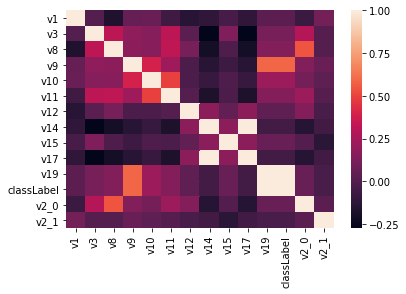

In [224]:
# Check if there are obvious correlations
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [210]:
train['classLabel'].corr(train['v19'])

1.0

In [ ]:
# Perfect correlation between target [classLabel] vs v19 columns, it's too easy.
# However, validation dataset doesn't show any correlation. Hence, we might have to remove the column [v19]
# Not to distract

In [226]:
train['classLabel'].corr(train['v9'])

0.5905999505996958

In [215]:
train[['v19', 'classLabel']].head()

,v19,classLabel
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


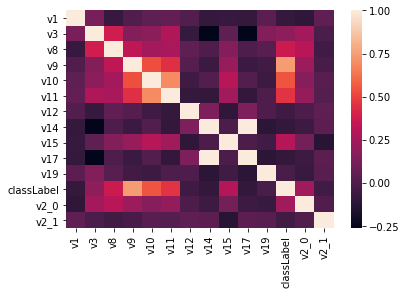

In [209]:
corr = valid.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [211]:
valid['classLabel'].corr(valid['v19'])

-0.01585069782918936

In [227]:
valid['classLabel'].corr(valid['v9'])

# Both in validation and training sets, there is high correlation between Target vs v9 columns

0.7459491609360492

In [234]:
valid[['v19', 'classLabel']].head()

,v19,classLabel
0,True,False
1,False,False
2,True,False
3,False,False
4,True,False


In [ ]:
CATEGORICAL_COLUMNS = [] 

In [235]:
# Save processed datasets for training stage
train.to_csv('db/train.csv', index=False)
valid.to_csv('db/valid.csv', index=False)